<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Расчёт эффективности восстановления золота из руды

**Задача**:<br>
Подготовить модель для предсказания коэффициента восстановления золота из золотосодержащей руды. <br>
<brt><br>
**Исходные данные**:<br>
Данные с параметрами добычи и очистки. 
<br><br>
**Решение**:
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
#Импортируем библиотеки и модули
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
#Создадим датасеты
df_train = pd.read_csv('gold_recovery_train_new.csv')
df_test = pd.read_csv('gold_recovery_test_new.csv')
df_full = pd.read_csv('gold_recovery_full_new.csv')

In [3]:
#Выводим датасеты для ознакомления
display(df_train.head())
display(df_test.head())
display(df_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
#Выводим информацию о датасетах
print(df_train.info())
print(df_test.info())
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


**Проверим, что в обучаюшей выборке эффективность обогащения - 'rougher.output.recovery' рассчитана правильно.**

In [5]:
# Объявим переменные
c = df_train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации
f = df_train['rougher.input.feed_au'] # доля з. в сырье до флотации
t = df_train['rougher.output.tail_au'] # доля з. в отвальных хвостах после флотации

# Формуля для рассчёта эффективности обогащения
recovery = (c*(f-t))/(f*(c-t))*100

# Создадим столбец с расчётом recovery
df_train['rougher.output.recovery_calc'] = recovery

In [6]:
#Вычислим MAE
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_calc'])

9.73512347450521e-15

In [7]:
#Удалим столбец 'rougher.output.recovery_calc'
df_train = df_train.drop(['rougher.output.recovery_calc'], axis = 1)

**Вывод**: MAE очень мало, значит, recovery расчитано верно

**Проанализируем признаки, недоступные в тестовой выборке.**

In [8]:
columns_train = list(df_train.columns) #список столбцов обучающей выборки
test_list = list(df_test.columns) #список столбцов тестовой выборки
absent_features = [] #список отсутствующих признаков

for i in columns_train:
    if i not in test_list:
        absent_features.append(i)
        
#absent_features

In [9]:
#Выделим из признаков этап и тип параметра

#Создадим список этапов:
steps_list = []

for i in absent_features:
    if i.split('.')[0] not in steps_list:
        steps_list.append(i.split('.')[0])
        

#print(steps_list)

#Создадим список типов параметров:
param_types_list = []

for i in absent_features:
    if i.split('.')[1] not in param_types_list:
        param_types_list.append(i.split('.')[1])
        
#print(param_types_list)

#Создадим список параметров:
params_list = []

for i in absent_features:
    if i.split('.')[2] not in params_list:
        params_list.append(i.split('.')[2])
        
#print(params_list)

In [10]:
print('В тестовой выборке для этапов:')
for i in steps_list:
    print('-', i)
    
print('\n Отсутствует ряд параметров, относящихся к типам:')
for i in param_types_list:
    print('-', i)

В тестовой выборке для этапов:
- final
- primary_cleaner
- rougher
- secondary_cleaner

 Отсутствует ряд параметров, относящихся к типам:
- output
- calculation


**Вывод**: В тестовой выборке отсутствует ряд параметров, отсносящихся к типу "параметры продукта" и "рассчётные характеристики".

**Проведём предобработку данных.**

In [11]:
#Изменим тип столбца date на datetime
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

In [12]:
#Проверим на явные дубликаты
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


Явные дубликаты не обнаружены

In [13]:
#Проверим на пропуски
display(pd.DataFrame(df_train.isna().mean()).style.background_gradient('coolwarm'))
display(pd.DataFrame(df_test.isna().mean()).style.background_gradient('coolwarm'))
display(pd.DataFrame(df_full.isna().mean()).style.background_gradient('coolwarm'))

,0
date,0.000000
final.output.concentrate_ag,0.000071
final.output.concentrate_pb,0.000071
final.output.concentrate_sol,0.014913
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,0.007068
final.output.tail_sol,0.000353
final.output.tail_au,0.000000


,0
date,0.000000
primary_cleaner.input.sulfate,0.000756
primary_cleaner.input.depressant,0.000945
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.000756
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000


,0
date,0.000000
final.output.concentrate_ag,0.000051
final.output.concentrate_pb,0.000051
final.output.concentrate_sol,0.010854
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000051
final.output.tail_pb,0.005196
final.output.tail_sol,0.000309
final.output.tail_au,0.000000


В некоторых признаках присутствуют пропуски. Исходя из условий задачи, что:<br>
-"Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.",<br>
заполним пропуски предыдущим доступным значением.

In [14]:
#Заполним пропуски во всех столбцах предыдущим значением
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

## Анализ данных

**Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.**

In [15]:
#Создадим списки с названием этапа и концентрацией каждого  металла
#В сырье до флотации
rougher_input = ['rougher.input', 
                 df_train['rougher.input.feed_au'].median(), 
                 df_train['rougher.input.feed_ag'].median(), 
                 df_train['rougher.input.feed_pb'].median()]


rougher_output = ['rougher.output', 
                 df_train['rougher.output.concentrate_au'].median(), 
                 df_train['rougher.output.concentrate_ag'].median(), 
                 df_train['rougher.output.concentrate_pb'].median()]


primary_cleaner_output = ['primary_cleaner.output', 
                 df_train['primary_cleaner.output.concentrate_au'].median(), 
                 df_train['primary_cleaner.output.concentrate_ag'].median(), 
                 df_train['primary_cleaner.output.concentrate_pb'].median()]

final_output = ['final.output', 
                 df_train['final.output.concentrate_au'].median(), 
                 df_train['final.output.concentrate_ag'].median(), 
                 df_train['final.output.concentrate_pb'].median()]

concentrations = [rougher_input, rougher_output, primary_cleaner_output, final_output]

In [16]:
#Создадим таблицу из этих списков
concentration_data = pd.DataFrame(concentrations, columns=[
    'Этап', 'Процент Au', 'Процент Ag', 'Процент Pb'])
concentration_data

,Этап,Процент Au,Процент Ag,Процент Pb
0,rougher.input,7.649138,8.156092,3.414267
1,rougher.output,19.947312,11.747362,7.760435
2,primary_cleaner.output,33.225835,8.226247,9.920598
3,final.output,44.872436,4.994607,10.297013


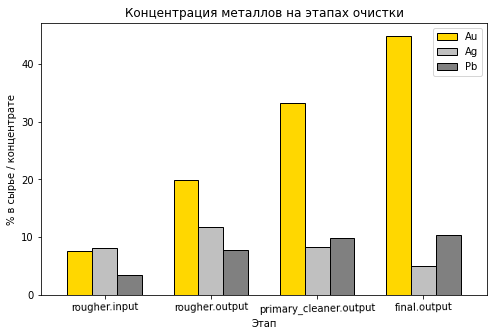

In [17]:
#Построим столбчатую диаграмму с концентрацией металлов для каждого этапа
concentration_data.plot(kind='bar', x='Этап', y=['Процент Au', 'Процент Ag', 'Процент Pb'], 
                        title='Концентрация металлов на этапах очистки', xlabel='Этап', ylabel='% в сырье / концентрате', 
                        color=['gold', 'silver', 'gray'], edgecolor = 'black', label = ['Au', 'Ag', 'Pb'], 
                        rot=True, width=0.7, figsize=(8, 5));

Построим гистограммы распределения для каждого металла

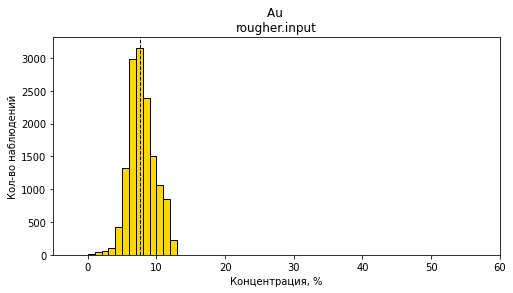

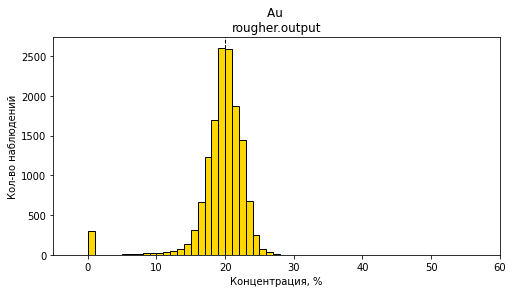

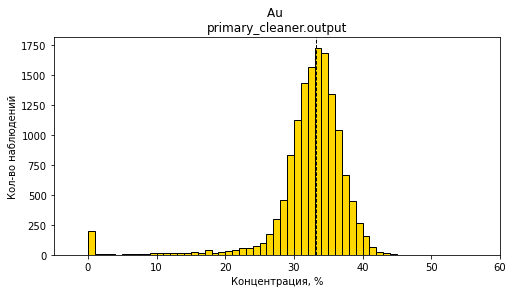

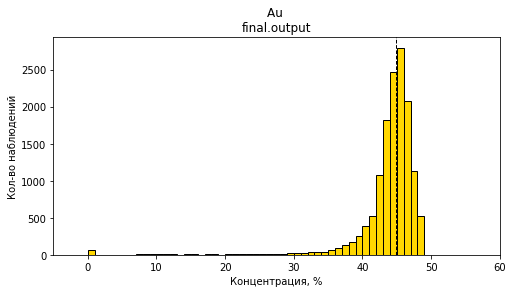

In [18]:
#Au золото
for step in ['rougher.input.feed_au', 
 'rougher.output.concentrate_au', 
 'primary_cleaner.output.concentrate_au', 
 'final.output.concentrate_au']:

    plt.figure(figsize=[8, 4])
    plt.xlim(-5, 60)
    plt.title(label = 'Au \n' + step.split('.')[0] + '.' + step.split('.')[1])
    plt.xlabel('Концентрация, %')
    plt.ylabel('Кол-во наблюдений')
    plt.hist(df_train[step], bins=range(0, 50, 1), color='gold', edgecolor='k');
    plt.axvline(df_train[step].median(), color='black', linestyle='dashed', linewidth=1, label='Медиана');
    plt.show()

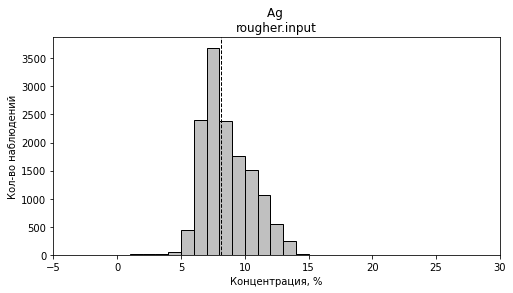

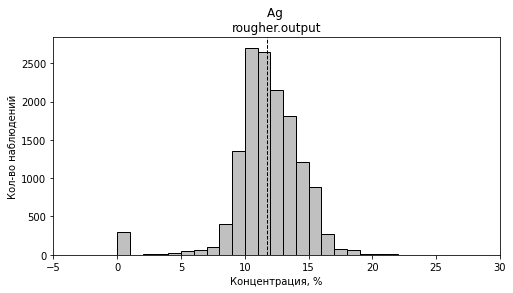

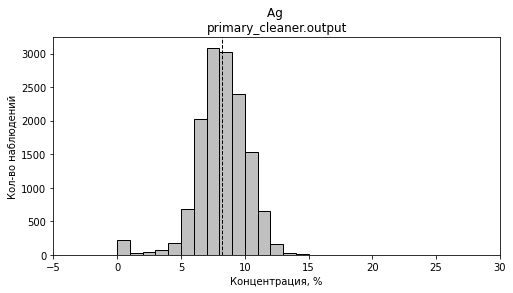

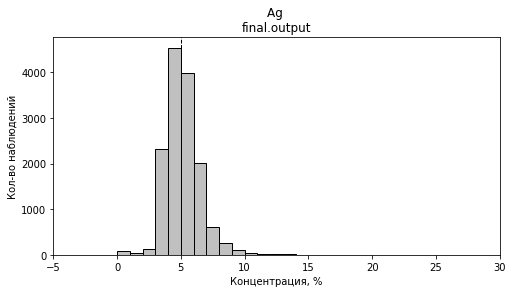

In [19]:
#Ag серебро
for step in ['rougher.input.feed_ag', 
 'rougher.output.concentrate_ag', 
 'primary_cleaner.output.concentrate_ag', 
 'final.output.concentrate_ag']:

    plt.figure(figsize=[8, 4])
    plt.xlim(-5, 30)
    plt.title(label = 'Ag \n' + step.split('.')[0] + '.' + step.split('.')[1])
    plt.xlabel('Концентрация, %')
    plt.ylabel('Кол-во наблюдений')
    plt.hist(df_train[step], bins=range(0, 50, 1), color='silver', edgecolor='k', label='Обучающая выборка');
    plt.axvline(df_train[step].median(), color='black', linestyle='dashed', linewidth=1, label='Медиана');
    plt.show()

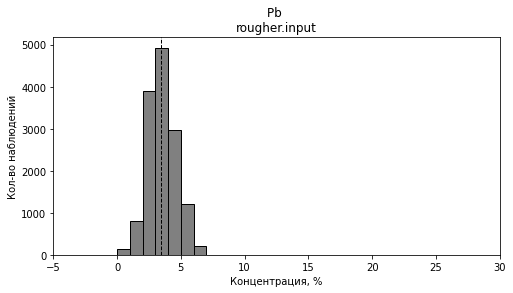

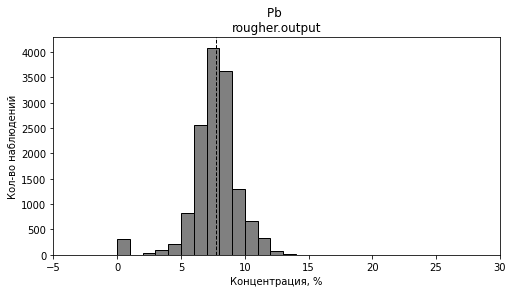

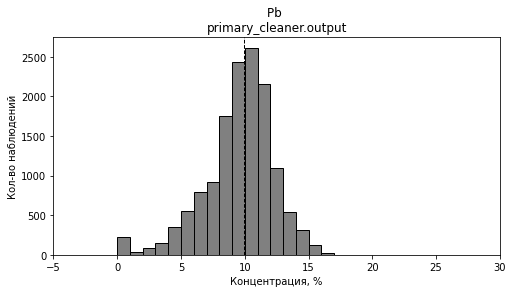

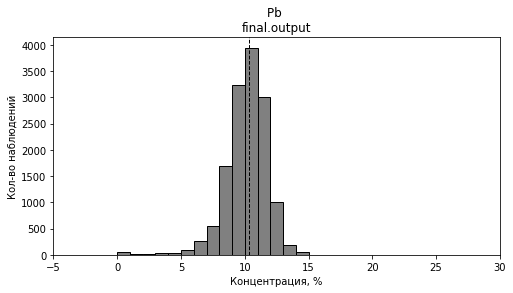

In [20]:
#Pb свинец
for step in ['rougher.input.feed_pb', 
 'rougher.output.concentrate_pb', 
 'primary_cleaner.output.concentrate_pb', 
 'final.output.concentrate_pb']:

    plt.figure(figsize=[8, 4])
    plt.xlim(-5, 30)
    plt.title(label = 'Pb \n' + step.split('.')[0] + '.' + step.split('.')[1])
    plt.xlabel('Концентрация, %')
    plt.ylabel('Кол-во наблюдений')
    plt.hist(df_train[step], bins=range(0, 50, 1), color='gray', edgecolor='k');
    plt.axvline(df_train[step].median(), color='black', linestyle='dashed', linewidth=1, label='Медиана');
    plt.show()

**Вывод**: 
- Доля золота(Au) заметно увеличивается по мере прохождения всех этапов очистки;
- Доля серебра(Ag) в сырье, в черновом конценрате после флотации и в черновом концентрате после первого этапа очистки остаётся примерно на одном уровне, а в финальном концентрате уменьшается почти в два раза;
- Доля свинца(Pb) увеличивается в два раза в черновом концентрате после флотации и растёт дальше по мере прохождения очистки, но уже не так интенсивно.

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

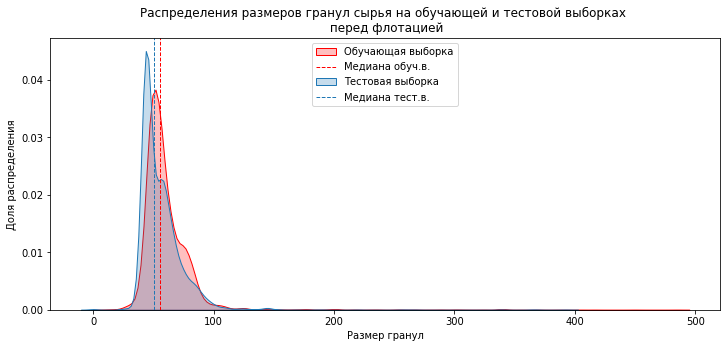

Медиана обучающей выборки:  55.269783890501536
Медиана тестовой выборки:  50.8468431600362
Разница между медианами: 8.00%


In [21]:
#Построим гистограммы распределения размеров гранул сырья для обучающей и тестовой выборок
# Этап 'rougher.input' - сырьё перед флотацией

median_train = df_train['rougher.input.feed_size'].median()
median_test = df_test['rougher.input.feed_size'].median()

plt.figure(figsize=[12, 5])
plt.title(label='Распределения размеров гранул сырья на обучающей и тестовой выборках \n перед флотацией')
plt.xlabel('Размер гранул')
plt.ylabel('Доля распределения')
sns.kdeplot(df_train['rougher.input.feed_size'], label='Обучающая выборка', color='r', fill=True)
plt.axvline(median_train, linestyle='dashed', linewidth=1, label='Медиана обуч.в.', color='r')
sns.kdeplot(df_test['rougher.input.feed_size'], label='Тестовая выборка', fill=True)
plt.axvline(median_test, linestyle='dashed', linewidth=1, label='Медиана тест.в.')
plt.legend(loc="upper center")
plt.show()
print('Медиана обучающей выборки: ', median_train)
print('Медиана тестовой выборки: ', median_test)
print('Разница между медианами: {:.2%}'.format((median_train - median_test)/median_train))

**Вывод**: Рапределения примерно одинаковы.

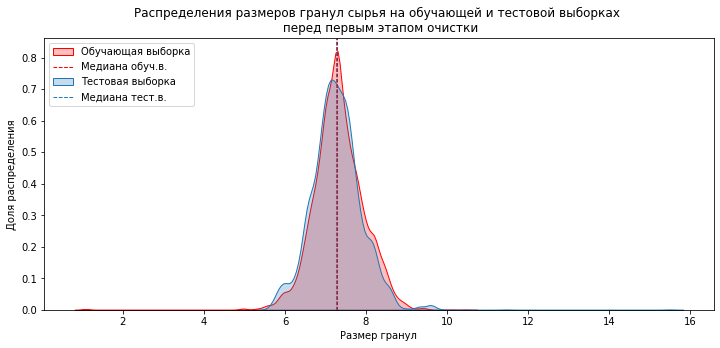

Медиана обучающей выборки:  7.289999961853027
Медиана тестовой выборки:  7.25
Разница между медианами: 0.55%


In [22]:
#Построим гистограммы распределения размеров гранул сырья для обучающей и тестовой выборок
#Этап 'primary_cleaner.input' - черновой концентрат перед первым этапом очистки

median_train = df_train['primary_cleaner.input.feed_size'].median()
median_test = df_test['primary_cleaner.input.feed_size'].median()

plt.figure(figsize=[12, 5])
plt.title(label='Распределения размеров гранул сырья на обучающей и тестовой выборках \n перед первым этапом очистки')
plt.xlabel('Размер гранул')
plt.ylabel('Доля распределения')
sns.kdeplot(df_train['primary_cleaner.input.feed_size'], label='Обучающая выборка', color='r', fill=True)
plt.axvline(median_train, linestyle='dashed', linewidth=1, label='Медиана обуч.в.', color='r')
sns.kdeplot(df_test['primary_cleaner.input.feed_size'], label='Тестовая выборка', fill=True)
plt.axvline(median_test, linestyle='dashed', linewidth=1, label='Медиана тест.в.')
plt.legend(loc="upper left")
plt.show()
print('Медиана обучающей выборки: ', median_train)
print('Медиана тестовой выборки: ', median_test)
print('Разница между медианами: {:.2%}'.format((median_train - median_test)/median_train))

**Вывод**: существенных различий между размерами гранул сырья на обучающей и тестовой выборках не наблюдается.

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [23]:
#Создадим список, куда будем добавлять суммарную концентрацию всех веществ на каждом этапе
total_concentration_list = []

- Суммарная концентарция в сырье

In [24]:
#Выделим из датсета признаки, которые характеризуют сырьё до флотации, т.е. содержат 'rougher.input'
rougher_input_features = []
for i in df_train.columns:
    if 'rougher.input' in i:
        rougher_input_features.append(i)
        
#rougher_input_features

In [25]:
#Исключим параметры, не касающиеся концентрации
rougher_input_features = rougher_input_features[:6]
rougher_input_features = rougher_input_features[:2] + rougher_input_features[4:]
#rougher_input_features

In [26]:
#Сложим концентрации всех веществ на этапе 'rougher.input'
rougher_input_concentration = 0
for i in rougher_input_features:
    rougher_input_concentration += df_train[i]#.median()

total_concentration_list.append(['rougher.input', rougher_input_concentration.median()])
#rougher_input_concentration

- В черновом концентрате после флотации

In [27]:
#Выделим из датсета признаки, которые характеризуют черновой концентрат после флотации, т.е. содерж. 'rougher.output'
rougher_output_features = []
for i in df_train.columns:
    if 'rougher.output' in i:
        rougher_output_features.append(i)
        
#rougher_output_features

In [28]:
#Исключим параметры, не касающиеся концентрации
rougher_output_features = rougher_output_features[:4]
#rougher_output_features

In [29]:
#Сложим концентрации всех веществ на этапе 'rougher.output'
rougher_output_concentration = 0
for i in rougher_output_features:
    rougher_output_concentration += df_train[i]#.median()
    

total_concentration_list.append(['rougher.output', rougher_output_concentration.median()])
#rougher_output_concentration

- В черновом концентрате после первого этапа очистки

In [30]:
#Выделим из датсета признаки, кот. характ. черновой концентрат после первого этапа очистки - 'primary_cleaner.output'
primary_cleaner_output_features = []
for i in df_train.columns:
    if 'primary_cleaner.output' in i:
        primary_cleaner_output_features.append(i)
        
#primary_cleaner_output_features

In [31]:
#Исключим параметры, кот. относятся к отвальным хвостам
primary_cleaner_output_features = primary_cleaner_output_features[:4]
#primary_cleaner_output_features

In [32]:
#Сложим концентрации всех веществ на этапе 'primary_cleaner.output'
primary_cleaner_output_concentration = 0
for i in primary_cleaner_output_features:
    primary_cleaner_output_concentration += df_train[i]#.median()
    
total_concentration_list.append(['primary_cleaner.output', primary_cleaner_output_concentration.median()])
#primary_cleaner_output_concentration

- В финальном концентрате

In [33]:
#Выделим из датсета признаки, кот. характ. финальный концентрат - 'final.output'
final_output_features = []
for i in df_train.columns:
    if 'final.output' in i:
        final_output_features.append(i)
        
#final_output_features

In [34]:
#Исключим параметры, кот. относятся к отвальным хвостам
final_output_features = final_output_features[:4]
#final_output_features

In [35]:
#Сложим концентрации всех веществ на этапе 'final.output'
final_output_concentration = 0
for i in final_output_features:
    final_output_concentration += df_train[i]#.median()
    
total_concentration_list.append(['final.output', final_output_concentration.median()])

In [36]:
#Создадим таблицу с суммарной концентрацией веществ на всех этапах
total_concentration_data = pd.DataFrame(total_concentration_list, columns=['Этап', 'Суммарная концентрация'])
total_concentration_data

,Этап,Суммарная концентрация
0,rougher.input,56.627635
1,rougher.output,69.175663
2,primary_cleaner.output,61.786946
3,final.output,69.141502


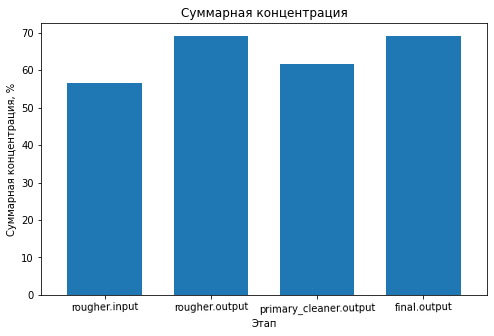

In [37]:
#Построим столбчатую диаграмму по таблице суммарной концентрации
total_concentration_data.plot(kind='bar', x='Этап', y='Суммарная концентрация', 
                        title='Суммарная концентрация', xlabel='Этап', ylabel='Суммарная концентрация, %', 
                              legend = None, rot=True, width=0.7, figsize=(8, 5));

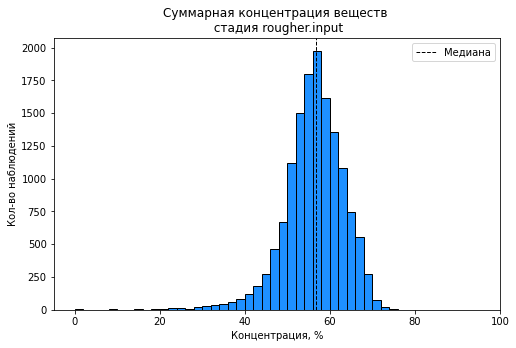

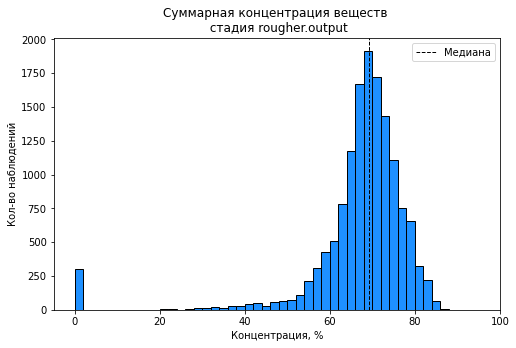

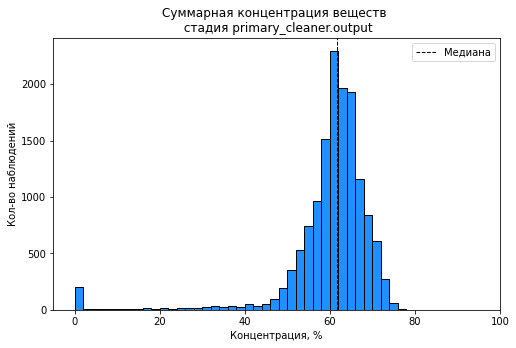

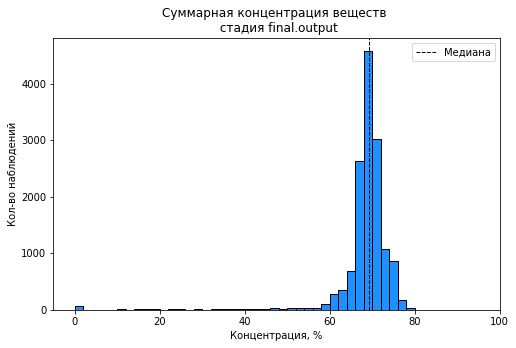

In [38]:
#Построим гистограмму распределения суммарной концентрации для каждого этапа

steps = {'rougher.input': rougher_input_concentration, 
         'rougher.output': rougher_output_concentration, 
         'primary_cleaner.output': primary_cleaner_output_concentration, 
         'final.output': final_output_concentration}

for step in steps.keys():

    plt.figure(figsize=[8, 5])
    plt.xlim(-5, 100)
    plt.title(label = 'Суммарная концентрация веществ \n стадия ' + step)
    plt.xlabel('Концентрация, %')
    plt.ylabel('Кол-во наблюдений')
    plt.hist(steps[step], bins=range(0, 100, 2), color='dodgerblue', edgecolor='k');
    plt.axvline(steps[step].median(), color='black', linestyle='dashed', linewidth=1, label='Медиана');
    plt.legend(loc="upper right")
    plt.show()

**Вывод**: После этапа флотации заметно увеличение суммарной концентрации веществ. После этапа первичной очистки концентрация немного уменьшается, а после второго этапа очистки снова увеличивается.<br><br>
На всех этапах очистки были выявлены значения суммарной концентрации веществ в сырье/конценрате, равные 0. Вероятно, это аномалии, т.к. отсутствие в сырье/концентрате сразу всех веществ маловероятно. Удалим объекты с нулевыми значениями суммарной концентрации из обучающей выборки.

In [39]:
#Удалим из обуч. в. объекты с суммраной концентрацией веществ равной 0 для каждого этапа очистки.
df_train = df_train[(df_train['rougher.input.feed_au'] != 0) & 
                    (df_train['rougher.input.feed_ag'] != 0) & 
                    (df_train['rougher.input.feed_pb'] != 0) & 
                    (df_train['rougher.input.feed_sol'] != 0)]
df_train = df_train[(df_train['rougher.output.concentrate_au'] != 0) & 
                    (df_train['rougher.output.concentrate_ag'] != 0) & 
                    (df_train['rougher.output.concentrate_pb'] != 0) & 
                    (df_train['rougher.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['primary_cleaner.output.concentrate_au'] != 0) & 
                    (df_train['primary_cleaner.output.concentrate_ag'] != 0) & 
                    (df_train['primary_cleaner.output.concentrate_pb'] != 0) & 
                    (df_train['primary_cleaner.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['final.output.concentrate_au'] != 0) & 
                    (df_train['final.output.concentrate_ag'] != 0) & 
                    (df_train['final.output.concentrate_pb'] != 0) & 
                    (df_train['final.output.concentrate_sol'] != 0)]

## Модель

**Напишем функцию для вычисления итоговой sMAPE.**

In [40]:
#Напишем функцию для вычисления sMAPE с аргументами: целевой признак, предсказания модели
def smape(targ, pred):
    a = abs(targ - pred) #числитель
    b = (abs(targ) + abs(pred))/2 #знаменатель
    result = ((a/b).sum()/len(targ)) * 100
    
    return result

In [41]:
#Напишем функцию для вычисления итоговой sMAPE с аргументами: sMAPE этапа rougher, - этапа final
def smape_final(smape_r, smape_f):
    result = smape_r * 0.25 + smape_f * 0.75
    
    return result

**Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.**

In [42]:
#Создадим scorer с финальной sMAPE для кросс-валидации
smape_scorer = make_scorer(smape, greater_is_better = False)

In [43]:
state = np.random.RandomState(12345)

Выделим из обучающей выборки только те признаки, которые есть в тестовой выборке.

In [44]:
df_train_models = df_train[list(df_test.columns)]

In [45]:
#исключим признак 'date'
df_train_models = df_train_models.drop(['date'], axis=1)

In [46]:
#Обозначим признаки и целевой признак
features_train = df_train_models
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']

**Решающее дерево**

Вычислим sMAPE для модели "Решающее дерево"

In [47]:
%%time

best_tree_smape = 100
best_depth = 0
for depth in range(1, 10, 1):
    model_tree_r = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_r = cross_val_score(model_tree_r,
                              features_train,
                              target_rougher_train,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_r = smape_r.mean()

    model_tree_f = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_f = cross_val_score(model_tree_f, 
                                  features_train,
                                  target_final_train,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_f = smape_f.mean()
    
    result_smape = smape_final(final_smape_r, final_smape_f)*(-1)
    print(result_smape, depth)
    if result_smape < best_tree_smape:
        best_tree_smape = result_smape
        best_depth = depth
        
print('Минимальная sMAPE:', best_tree_smape, ', max_depth =', best_depth)

9.306249213352297 1
9.022468527243579 2
8.894948412843105 3
9.13099040476403 4
9.556594287977797 5
10.09537590831251 6
10.58526046313914 7
10.556471301019121 8
10.85858682847651 9
Минимальная sMAPE: 8.894948412843105 , max_depth = 3
CPU times: total: 2min 35s
Wall time: 2min 50s


**Случайный лес**

Вычислим sMAPE для модели "Случайный лес"

In [58]:
%%time
#Найёдм минимальную sMAPE для различных гиперпараметров

best_forest_smape = 100
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range(2, 10, 2):
        model_forest_r = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        smape_r = cross_val_score(model_forest_r,
                                  features_train,
                                  target_rougher_train,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_r = smape_r.mean()

        model_forest_f = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        smape_f = cross_val_score(model_forest_f,
                                features_train,
                                target_final_train,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_f = smape_f.mean()
        
        result_smape = smape_final(final_smape_r, final_smape_f)*(-1)
        print(result_smape, est, depth)
        if result_smape < best_forest_smape:
            best_forest_smape = result_smape
            best_est = est
            best_depth = depth
        
print('Минимальная sMAPE:', best_forest_smape, ', n_estimators =', best_est,  ', max_depth =', best_depth)

8.739121723127836 10 2
8.438600925664765 10 4
8.732715033964755 10 6
9.137536360433366 10 8
8.741963289481836 20 2
8.503048927786761 20 4
8.72225327061026 20 6
9.08277149575039 20 8
8.707935701918029 30 2
8.45456802242029 30 4
8.62935849969158 30 6
8.921072221752373 30 8
8.69326091923553 40 2
8.410542222026999 40 4
8.559748078733179 40 6
8.836840406728413 40 8
8.682360603848947 50 2
8.417993558804916 50 4
8.603868234920075 50 6
8.84787508805575 50 8
Минимальная sMAPE: 8.410542222026999 , n_estimators = 40 , max_depth = 4
CPU times: total: 2h 15min 19s
Wall time: 2h 19min 39s


**Линейная регрессия**

Вычислим sMAPE для модели "Линейная регрессия"

In [50]:
%%time

model_regression_rougher = LinearRegression()
smape_r = cross_val_score(model_regression_rougher,
                                  features_train,
                                  target_rougher_train,
                                  scoring=smape_scorer,
                                  cv=5)
final_smape_r = smape_r.mean()

model_regression_final = LinearRegression()
smape_f = cross_val_score(model_regression_final,
                                  features_train,
                                  target_rougher_train,
                                  scoring=smape_scorer,
                                  cv=5)
final_smape_f = smape_f.mean()

result_smape = smape_final(final_smape_r, final_smape_f)*(-1)
print('sMAPE:', result_smape)

sMAPE: 7.270025499957147
CPU times: user 2.52 s, sys: 7.58 s, total: 10.1 s
Wall time: 10.1 s


**Вывод**: Минимальную метрику sMAPE = 7.27 показала модель "Линейна регрессия".

**Подготовим тестовую выборку для проверки модели**

In [51]:
#Выделим из df_full столбцы с датой и целевыми признаками
targets_for_test = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [52]:
#Добавим целевые признаки в тестовую выборку
df_test_targets = df_test.merge(targets_for_test, on='date', how='left')

In [53]:
#Выделим признаки и целевой признак
features_test = df_test_targets.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_test = df_test_targets['rougher.output.recovery']
target_final_test = df_test_targets['final.output.recovery']

**Проверим модель на тестовой выборке**

In [54]:
model_regression = LinearRegression()

In [55]:
#Обучим модель для предск. 'rougher.output.recovery'
model_regression.fit(features_train, target_rougher_train)
predictions_rougher_test = model_regression.predict(features_test)

In [56]:
#Обучим модель для предск. 'final.output.recovery'
model_regression.fit(features_train, target_final_train)
predictions_final_test = model_regression.predict(features_test)

In [57]:
print('Итоговое sMAPE =', 
      smape_final(smape(target_rougher_test, predictions_rougher_test), smape(target_final_test, predictions_final_test)))

Итоговое sMAPE = 9.342448724813984


**Сравним подготовленную модель с константной моделью, которая предсказывает медиану по целевому признаку**

In [58]:
#Объявим константные модели
dummy_regression_r = DummyRegressor(strategy="median")
dummy_regression_f = DummyRegressor(strategy="median")

#Обучим модели
dummy_regression_r.fit(features_train, target_rougher_train)
dummy_regression_f.fit(features_train, target_final_train)

#Получим предсказания моделей
dummy_predictions_r = dummy_regression_r.predict(features_test)
dummy_predictions_f = dummy_regression_f.predict(features_test)

#Вычислим sMAPE
print('Итоговое sMAPE для константной модели =',
      smape_final(smape(target_rougher_test, dummy_predictions_r), smape(target_final_test, dummy_predictions_f)))

Итоговое sMAPE для константной модели= 9.440747843838647


**Вывод**: Подготовленная модель "Линейная регрессия" показала sMAPE меньше, чем константная модель, что означает хорошее качество подготовленной модели.

## Общий вывод

По условиям задачи необходимо было подготовить прототип модели машинного обучения для оптимизирации производства, чтобы не запускать предприятие с убыточными характеристиками. Мордель должна предсказать коэффициент восстановления золота из золотосодержащей руды по имеющимся характеристикам. 

На первом этапе работы была проведена подготовка данных и заполнены пропущенные значения.

На втором этапе было проведено исследование изменения концетрации металлов по мере прохождения этапов очистки. Исследование показало, что:
- Доля золота(Au) заметно увеличивается по мере прохождения всех этапов очистки;
- Доля серебра(Ag) в сырье, в черновом конценрате после флотации и в черновом концентрате после первого этапа очистки остаётся примерно на одном уровне, а в финальном концентрате уменьшается почти в два раза;
- Доля свинца(Pb) увеличивается в два раза в черновом концентрате после флотации и растёт дальше по мере прохождения очистки, но уже не так интенсивно.

Также было исследовано изменение суммарной концентрации всех веществ на различных этапах очистки. Было выявлено, что после этапа флотации суммарная концентрация веществ заметно увеличивается, после этапа первичной очистки немного уменьшается, а после второго этапа очистки снова увеличивается.

На третьем этапе работы был подготовлен прототип модели машинного обучения, метрика sMAPE которой составила 9,34 на тестовой выборке. Было проведено сравнение sMAPE подготовленной модели и константнйо модели, предсказывающей медиану целевого признака. sMAPE подготовленной модели оказалось меньше, чем у константной модели: 9,34 и 9,44 соответственно, что означает хорошее качество подготовленной модели.